In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data2d = np.loadtxt('data_DMAP_PCA_vadere.txt')

### Selecting first two pedestrian and plotting their path

In [3]:
x11 = data2d[:, 0]
y11 = data2d[:, 1]
x12 = data2d[:, 2]
y12 = data2d[:, 3]

In [4]:
def plots(x,y):
    fig, ax = plt.subplots()
    ax.plot(x, y)
    ax.set(xlabel='x', ylabel='f(x)')
    
    plt.show()

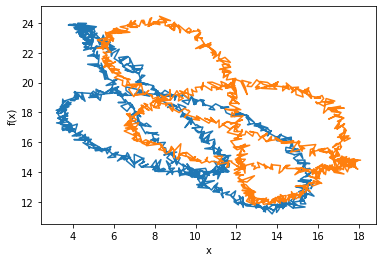

In [5]:
fig, ax = plt.subplots()
ax.plot(x11, y11)
ax.plot(x12, y12)
ax.set(xlabel='x', ylabel='f(x)')
fig.savefig("twopedes.png")
plt.show()

### PCA essentials

In [6]:
def removeMean(value):
    mean = np.mean(value, axis=1)
    centered_data2d = np.zeros((value.shape[0], value.shape[1]))
    for i in range(len(value)):
        centered_data2d[i] = value[i]-mean[i]
    return mean, centered_data2d

def addMean(value, mean):
    centered_data2d = np.zeros((value.shape[0], value.shape[1]))
    for i in range(len(value)):
        centered_data2d[i] = value[i]+ mean[i]
    return centered_data2d

In [7]:
def PCA3D(X, k=0):
    mean, X = removeMean(X)
    U,S,V = np.linalg.svd(X)
    tr = sum(S)
    E = 100
    if not k:
        matS = np.zeros((X.shape[0], X.shape[1]))
        matS[:X.shape[0], :X.shape[0]] = np.diag(S)
        reconstm = U@matS@V
        reconstm = addMean(reconstm, mean)
        return E, reconstm
    else:
        sumSK = sum(S[:k])
        E = (sumSK/tr)*100
        reconstm = np.dot(U[:,:k],np.dot(np.diag(S[:k]),V[:k,:]))
        reconstm = addMean(reconstm, mean)
        return E, reconstm

### k = 2

In [13]:
E1, res1 = PCA3D(data2d, k=2)
print(E1)

64.96452926426997


In [10]:
x1 = res1[:, 0]
y1 = res1[:, 1]
x2 = res1[:, 2]
y2 = res1[:, 3]

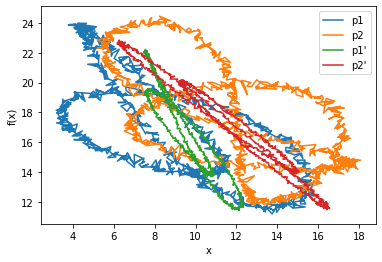

In [12]:
fig, ax = plt.subplots()
ax.plot(x11, y11)
ax.plot(x12, y12)
ax.plot(x1, y1)
ax.plot(x2, y2)
ax.set(xlabel='x', ylabel='f(x)')
ax.legend(['p1','p2','p1\'', 'p2\''])
fig.savefig("twopedestwoproj.png")
plt.show()

### Capture most of the path with k principal components

In [24]:
E1, res1 = PCA3D(data2d, k=4)
print(E1)

92.45427802553682


In [16]:
x1 = res1[:, 0]
y1 = res1[:, 1]
x2 = res1[:, 2]
y2 = res1[:, 3]

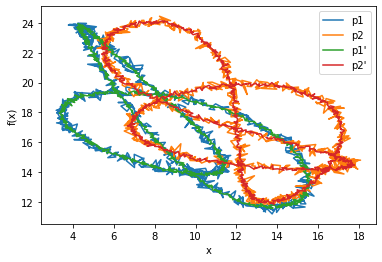

In [17]:
fig, ax = plt.subplots()
ax.plot(x11, y11)
ax.plot(x12, y12)
ax.plot(x1, y1)
ax.plot(x2, y2)
ax.set(xlabel='x', ylabel='f(x)')
ax.legend(['p1','p2','p1\'', 'p2\''])
fig.savefig("twopedesfinalproj.png")
plt.show()